---
# Data Science and Artificial Intelliegence Practicum
## 5-modul. Machine Learning
---

## 5.5 - Predicting house prices in Tashkent.

---
**CRISP-DM:**
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

---

**STEPS:**
1. Data Preparation
2. Data Understanding
3. Data Cleaning
4. Analyzing Data
5. Pipeline
6. Machine Learning
7. Evaluation
8. Saving the Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/blob/main/housing_data_08-02-2021.csv?raw=True")
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


### Definition of columns:

- `location` - address of the house for sale
- `district` - district where the house is located
- `rooms` - number of rooms
- `size` - house area (sq.m)
- `level` - level(floor) where the house located
- `max_levels` - total number of levels
- `price` - price of the house

### Data Cleaning

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


We can see that there are no `NaN` values in the dataset. However, despite the fact that `size` and `price` columns are numbers, their data type is `object`. First, we convert these columns to numeric values.

In [3]:
size_col = np.array(df['size'], dtype='float64')
size_col

ValueError: could not convert string to float: 'Площадьземли:1сот'

In [4]:
df[df['size']=='Площадьземли:1сот']

,location,district,rooms,size,level,max_levels,price
5347,"город Ташкент, Яшнободский район, Дархон",Яшнободский,4,Площадьземли:1сот,3,5,150000


`size` column has non-numeric value: **'Площадьземли:1сот'**.\
It's like russian word *«сотка»* whichis is equal `100 m²`. [Wiki reference](https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D1%82%D0%BA%D0%B0#:~:text=%D0%90%D1%80%20(%D0%B2%20%D1%80%D0%B0%D0%B7%D0%B3%D0%BE%D0%B2%D0%BE%D1%80%D0%BD%D0%BE%D0%B9%20%D1%80%D0%B5%D1%87%D0%B8%20%D1%82%D0%B0%D0%BA%D0%B6%D0%B5%20%C2%AB%D1%81%D0%BE%D1%82%D0%BA%D0%B0%C2%BB%2C%20%D0%BE%D1%82%201/100%20%D0%B3%D0%B5%D0%BA%D1%82%D0%B0%D1%80%D0%B0)%C2%A0%E2%80%94%20%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D0%B5%D0%B4%D0%B8%D0%BD%D0%B8%D1%86%D0%B0%20%D0%B8%D0%B7%D0%BC%D0%B5%D1%80%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D0%B8%2C%20%D1%80%D0%B0%D0%B2%D0%BD%D0%B0%D1%8F%20100%C2%A0%D0%BC%C2%B2.)\
This means that we can convert this to a number.

In [5]:
df.loc[5347, 'size'] = 100
df.loc[[5347]]

,location,district,rooms,size,level,max_levels,price
5347,"город Ташкент, Яшнободский район, Дархон",Яшнободский,4,100,3,5,150000


In [6]:
size_col = np.array(df['size'], dtype='float64')
size_col

array([57., 52., 42., ..., 64., 18., 30.])

In [7]:
df['size'] = size_col

In [8]:
price_col = np.array(df['price'], dtype='float64')
price_col

ValueError: could not convert string to float: 'Договорная'

In [9]:
df[df['price']=='Договорная']

,location,district,rooms,size,level,max_levels,price
202,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,3,119.0,3,9,Договорная
411,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,4,160.0,4,9,Договорная
439,"город Ташкент, Мирзо-Улугбекский район, улица ...",Мирзо-Улугбекский,3,105.0,5,6,Договорная
460,"город Ташкент, Чиланзарский район, Чиланзар 1-...",Чиланзарский,3,90.0,6,8,Договорная
507,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,48.0,4,4,Договорная
...,...,...,...,...,...,...,...
7039,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38.7,3,8,Договорная
7196,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,2,51.0,3,4,Договорная
7323,"город Ташкент, Мирзо-Улугбекский район, жилой ...",Мирзо-Улугбекский,6,208.0,1,7,Договорная
7403,"город Ташкент, Учтепинский район, Чиланзар 14-...",Учтепинский,2,35.0,2,9,Договорная


`price` column also has non-numeric values: **'Договорная'**, which we can translate as *'negotiable'*. We need to convert this value to `NaN` value in order to filling it later.

In [10]:
indices = df[df['price'] == 'Договорная'].index
df.loc[indices, 'price'] = np.nan

In [11]:
df.loc[indices]

,location,district,rooms,size,level,max_levels,price
202,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,3,119.0,3,9,NaN
411,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,4,160.0,4,9,NaN
439,"город Ташкент, Мирзо-Улугбекский район, улица ...",Мирзо-Улугбекский,3,105.0,5,6,NaN
460,"город Ташкент, Чиланзарский район, Чиланзар 1-...",Чиланзарский,3,90.0,6,8,NaN
507,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,48.0,4,4,NaN
...,...,...,...,...,...,...,...
7039,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38.7,3,8,NaN
7196,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,2,51.0,3,4,NaN
7323,"город Ташкент, Мирзо-Улугбекский район, жилой ...",Мирзо-Улугбекский,6,208.0,1,7,NaN
7403,"город Ташкент, Учтепинский район, Чиланзар 14-...",Учтепинский,2,35.0,2,9,NaN


In [12]:
price_col = np.array(df['price'], dtype='float64')
price_col

array([52000., 56000., 37000., ..., 40000., 11000., 22914.])

In [13]:
df['price'] = price_col

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7565 non-null   object 
 1   district    7565 non-null   object 
 2   rooms       7565 non-null   int64  
 3   size        7565 non-null   float64
 4   level       7565 non-null   int64  
 5   max_levels  7565 non-null   int64  
 6   price       7466 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 413.8+ KB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rooms,7565.0,2.625644,1.085201,1.0,2.0,3.0,3.0,10.0
size,7565.0,113.267236,1491.213517,1.0,50.0,66.0,86.0,70000.0
level,7565.0,3.699273,2.237275,1.0,2.0,3.0,5.0,19.0
max_levels,7565.0,6.038202,2.613271,1.0,4.0,5.0,9.0,25.0
price,7466.0,71334.210421,640523.683731,2.0,35000.0,46500.0,67000.0,52000000.0


We can see *outliers* in `size` and `price` column.

### Data Understanding

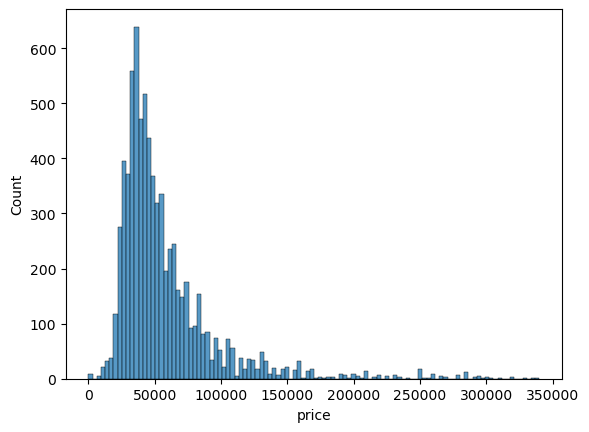

In [90]:
sns.histplot(x=df[df['price'] < 350_000]['price']);

In [ ]:
import matplotlib.style as style
style.available

<AxesSubplot: xlabel='rooms', ylabel='price'>

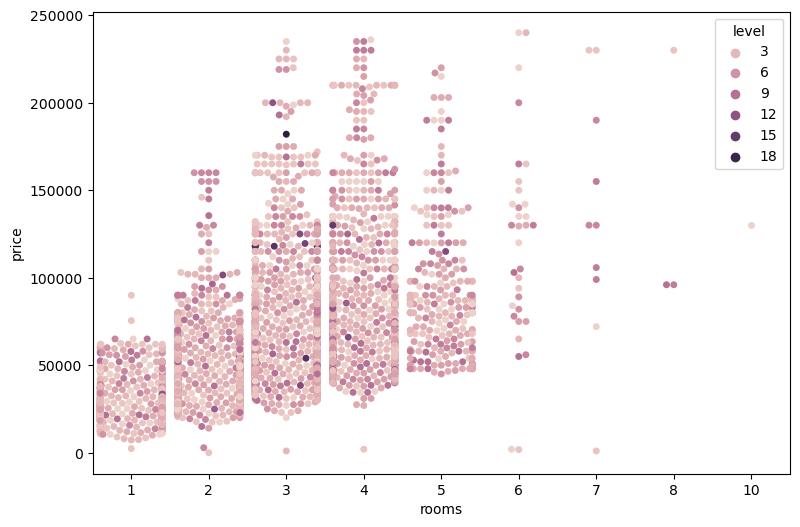

In [75]:
style.use('fivethirtyeight')
plt.figure(figsize=[9, 6])
sns.swarmplot(data=df[df['price'] < 250_000],
              x='rooms', y='price', hue='level')
# location
# district
# rooms
# size
# level
# max_level

In [ ]:
sns.pairplot(df);

In [98]:
np.log10(df['price'].describe())

count    3.873088
mean     4.853298
std      5.806535
min      0.301030
25%      4.544068
50%      4.667453
75%      4.826075
max      7.716003
Name: price, dtype: float64

In [ ]:
## Axis transformation
# bin sizes
bins = 10 ** np.arange(0.3, 8+0.2, 0.2)
plt.hist(data=df, x='price', bins=bins)
plt.xscale('log')

# Apply x-axis label
plt.xlabel("x-axis limits are changed, and scaled to log-type");

In [ ]:
# Get the ticks for bins between [0 - maximum weight]
bins = 10 ** np.arange(-1, 3+0.1, 0.1)

# Generate the x-ticks you want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
# Convert ticks into string values, to be displaye along the x-axis
labels = [f'{v}' for v in ticks]

# Plot the histogram
plt.hist(data=df, x='weight', bins=bins)
plt.xscale('log')
# Apply x-ticks
plt.xticks(ticks, labels);